# Librerias y funciones

In [11]:
# calculos y manejo de data
import numpy as np
import pandas as pd
import yfinance as yf

# visualizacion
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [23]:
# funciones
def to_returns(prices: pd.DataFrame, method="log"):
    """Convierte precios a retornos diarios."""
    if method == "log":
        return np.log(prices).diff().dropna()
    else:
        return prices.pct_change().dropna()

def annualize_mean(r, periods_per_year=252):
    return r.mean() * periods_per_year

def annualize_vol(r, periods_per_year=252):
    return r.std() * np.sqrt(periods_per_year)

def sharpe_ratio(r, rf=0.0, periods_per_year=252):
    # rf en misma frecuencia que r (si rf anual, conviértelo antes)
    excess = r - rf
    return annualize_mean(excess, periods_per_year) / annualize_vol(r, periods_per_year)

# Descarga

In [6]:
# ejemplo con un elemento
ticker = ['spy']
fecha_inicio = '2008-01-01'
fecha_final = '2025-01-31'
df = yf.download(ticker, start=fecha_inicio, end=fecha_final)
df.head(3)

/var/folders/s_/5k93dhc10nvdkrdmrkx6yqvr0000gn/T/ipykernel_21918/2669455590.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=fecha_inicio, end=fecha_final)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2008-01-02,103.778275,105.253363,103.026422,104.923972,204935600
2008-01-03,103.728127,104.179246,103.162446,103.763932,125133300
2008-01-04,101.186172,102.711380,100.899754,102.639770,232330900


In [7]:
df[['Close', 'Volume']].head(2)

Price,Close,Volume
Ticker,SPY,SPY
Date,,
2008-01-02,103.778275,204935600
2008-01-03,103.728127,125133300


In [12]:
# ejemplo con más de un elemento
ticker = ['spy', 'meta']
fecha_inicio = '2020-01-01'
fecha_final = '2025-01-31'
df = yf.download(ticker, start=fecha_inicio, end=fecha_final, progress=False)['Close']
df.tail(3)

Ticker,META,SPY
Date,,
2025-01-28,672.210327,597.503479
2025-01-29,674.363525,594.824829
2025-01-30,684.840454,598.017395


# Gráfica de precios y rendimientos

In [14]:
df.index.values

array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', ...,
       '2025-01-28T00:00:00.000000000', '2025-01-29T00:00:00.000000000',
       '2025-01-30T00:00:00.000000000'],
      shape=(1277,), dtype='datetime64[ns]')

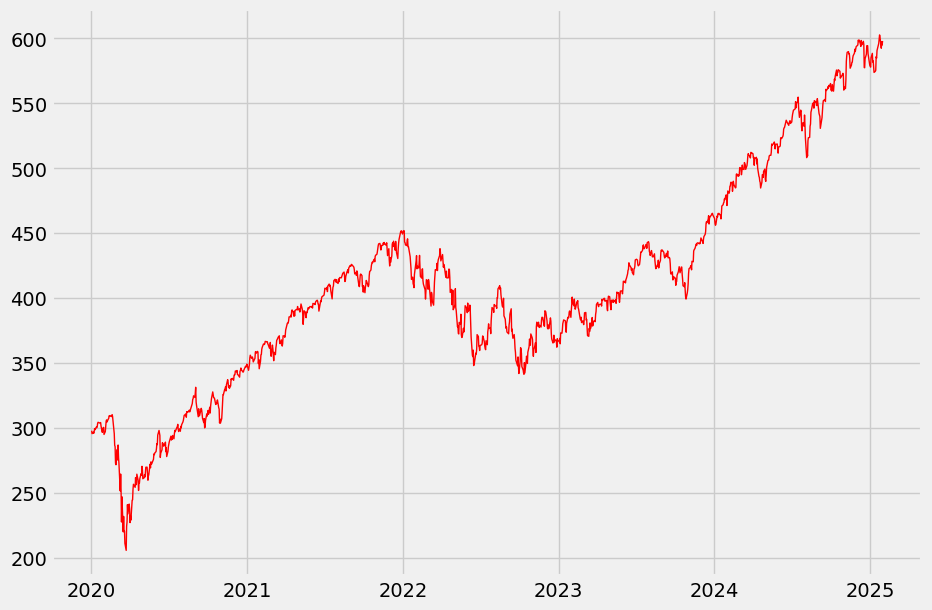

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

ax.plot(df.index.values, df.SPY, color='red', linewidth=1.0)

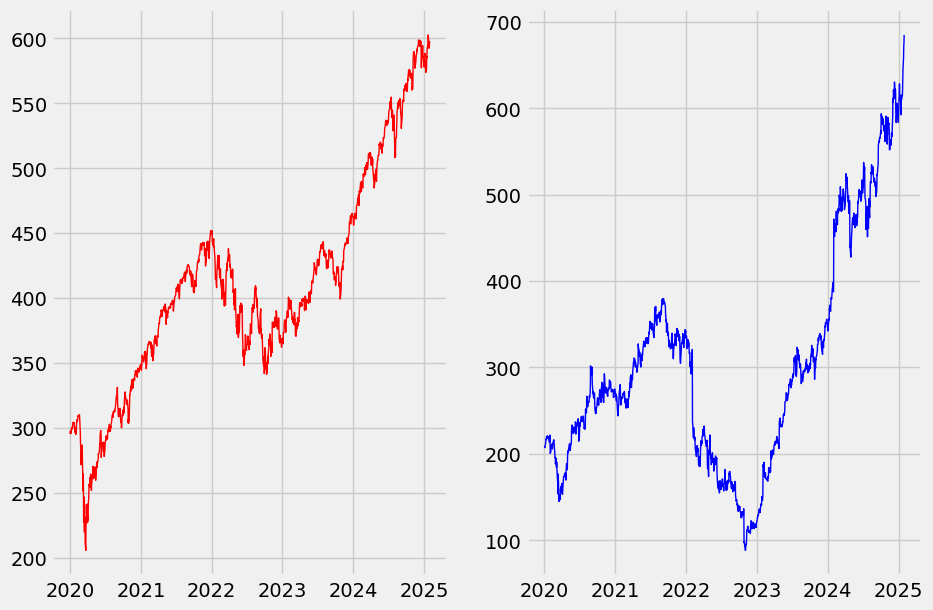

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))

ax[0].plot(df.index.values, df.SPY, color='red', linewidth=1.0)
ax[1].plot(df.index.values, df.META, color='blue', linewidth=1.0)

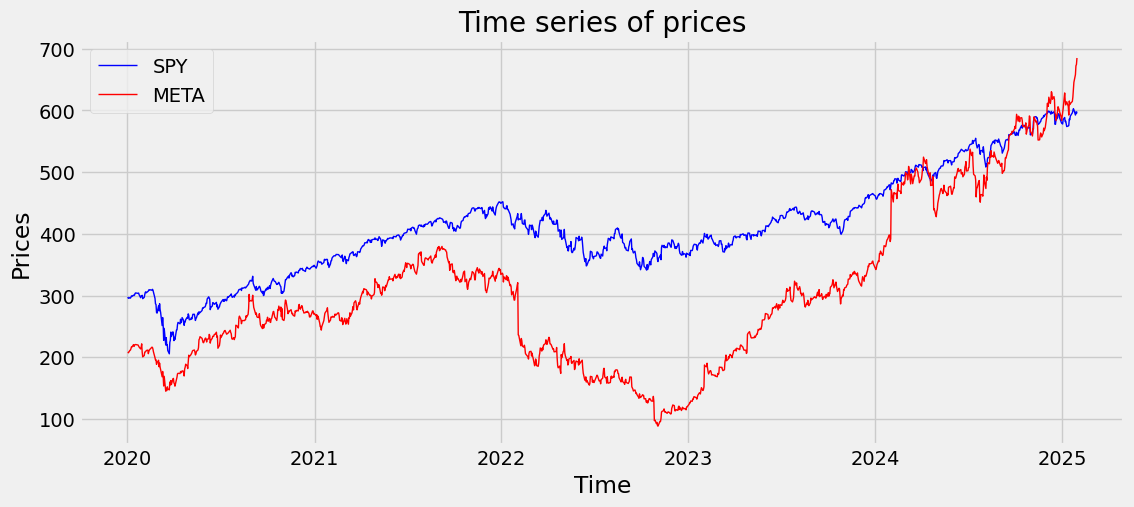

In [21]:
# plot precios normalizados
plt.figure(figsize=(12,5))
plt.title('Time series of prices')
plt.ylabel('Prices')
plt.plot(df.index.values, df.SPY, color='blue', label='SPY', linewidth=1.0)
plt.plot(df.index.values, df.META, color='red', label='META', linewidth=1.0)
plt.legend(loc=0)
plt.xlabel('Time')
# plt.grid()
plt.show()

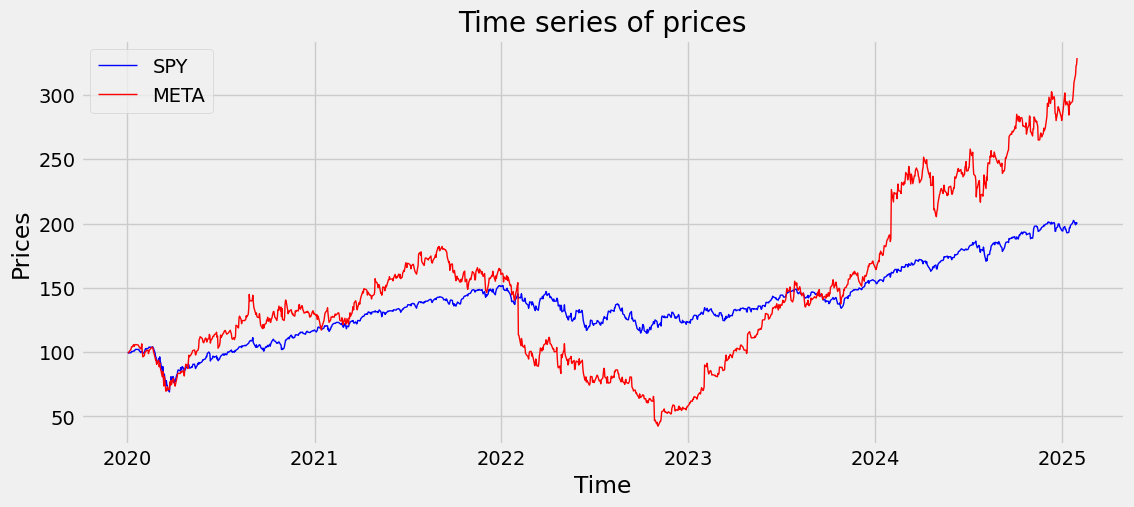

In [22]:
# plot precios normalizados
plt.figure(figsize=(12,5))
plt.title('Time series of prices')
plt.ylabel('Prices')
plt.plot(df.index.values, 100*(df.SPY / df.SPY.iloc[0]), color='blue', label='SPY', linewidth=1.0)
plt.plot(df.index.values, 100*(df.META / df.META.iloc[0]), color='red', label='META', linewidth=1.0)
plt.legend(loc=0)
plt.xlabel('Time')
# plt.grid()
plt.show()

In [26]:
df_rets = to_returns(df[['SPY', 'META']], method="arithmetic")
df_rets.head(3)

Ticker,SPY,META
Date,,
2020-01-03,-0.007572,-0.005291
2020-01-06,0.003815,0.018834
2020-01-07,-0.002812,0.002164


Text(0.5, 1.0, 'Rendimientos diarios meta')

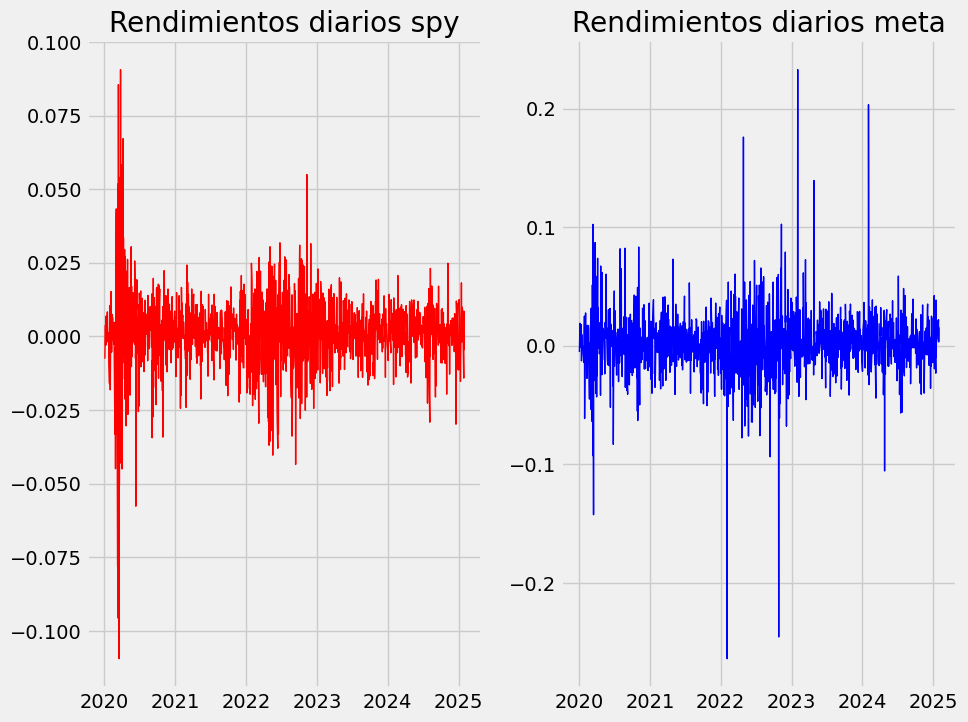

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10,8))

ax[0].plot(df_rets.index.values, df_rets.SPY, color='red', linewidth=1.0)
ax[0].set_title("Rendimientos diarios spy")
ax[1].plot(df_rets.index.values, df_rets.META, color='blue', linewidth=1.0)
ax[1].set_title("Rendimientos diarios meta")

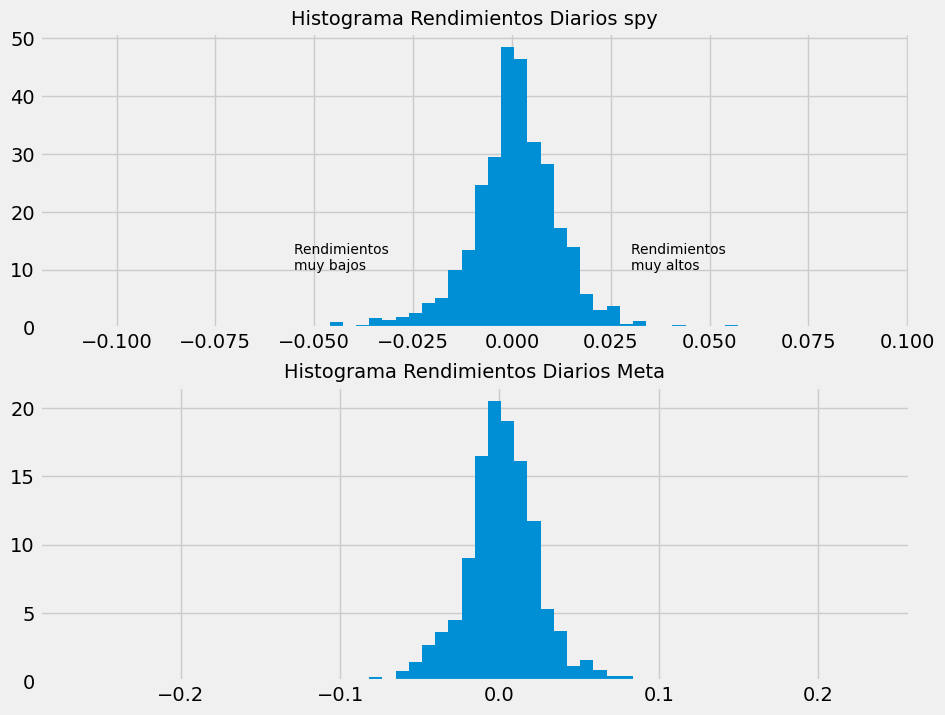

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))

ax[0].hist(df_rets.SPY,bins=60, density=True)
ax[0].set_title("Histograma Rendimientos Diarios spy", fontdict = {'fontsize': 14})
ax[0].text(-.055,10,"Rendimientos \nmuy bajos", fontdict = {'fontsize': 10})
ax[0].text(.03,10,"Rendimientos \nmuy altos", fontdict = {'fontsize': 10})

ax[1].hist(df_rets.META, bins=60, density=True)
ax[1].set_title("Histograma Rendimientos Diarios Meta", fontdict = {'fontsize': 14})

plt.show()

In [34]:
df_rets['SPY_cum_return'] = (1+df_rets['SPY']).cumprod()-1
df_rets['META_cum_return'] = (1+df_rets['META']).cumprod()-1

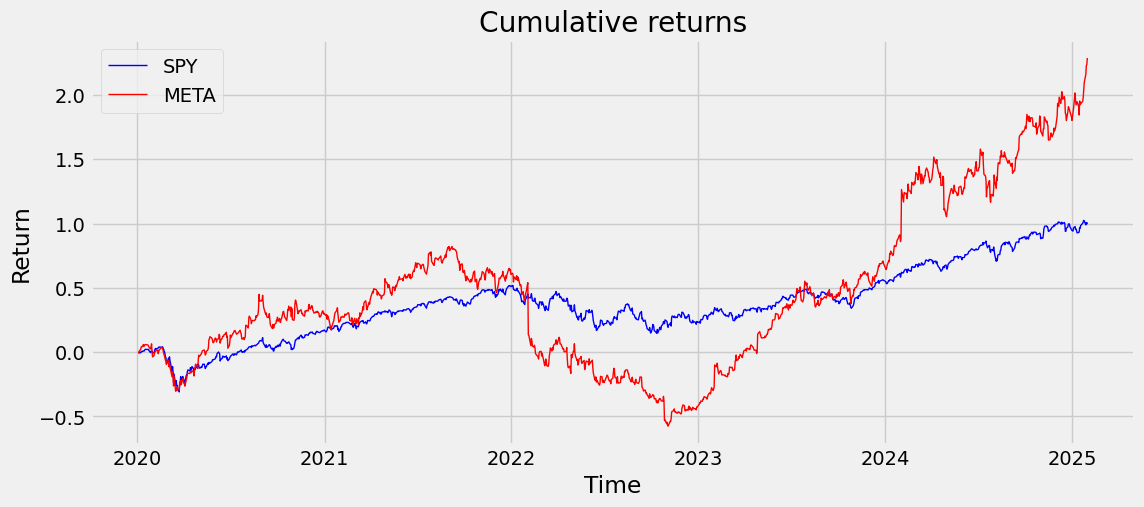

In [37]:
# plot rendimientos acumulados
plt.figure(figsize=(12,5))
plt.title('Cumulative returns')
plt.ylabel('Return')
plt.plot(df_rets.index.values, df_rets.SPY_cum_return , color='blue', label='SPY', linewidth=1.0)
plt.plot(df_rets.index.values, df_rets.META_cum_return , color='red', label='META', linewidth=1.0)
plt.legend(loc=0)
plt.xlabel('Time')
# plt.grid()
plt.show()

In [40]:
mean_spy = annualize_mean(df_rets.SPY, periods_per_year=252)
mean_meta = annualize_mean(df_rets.META, periods_per_year=252)

vol_spy = annualize_vol(df_rets.SPY, periods_per_year=252)
vol_meta = annualize_vol(df_rets.META, periods_per_year=252)

sharpe_psy = sharpe_ratio(df_rets.SPY, rf=0.0, periods_per_year=252)
sharpe_meta = sharpe_ratio(df_rets.META, rf=0.0, periods_per_year=252)

print(f"Rendimiento anualizado SPY: {mean_spy:.4f}")
print(f"Rendimiento anualizado META: {mean_meta:.4f}")
print()
print(f"Volatilidad anualizada SPY: {vol_spy:.4f}")
print(f"Volatilidad anualizada META: {vol_meta:.4f}")
print()
print(f"Sharpe ratio SPY: {sharpe_psy:.4f}")
print(f"Sharpe ratio META: {sharpe_meta:.4f}")

Rendimiento anualizado SPY: 0.1598
Rendimiento anualizado META: 0.3364

Volatilidad anualizada SPY: 0.2091
Volatilidad anualizada META: 0.4472

Sharpe ratio SPY: 0.7641
Sharpe ratio META: 0.7522
